In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [14]:
cancer = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
cancer.shape

(569, 6)

### Checking for how many instances of malignant (encoded 0) and how many benign (encoded 1)

In [16]:
malignant = len(cancer[cancer['diagnosis'] == 0 ])
benign  = len(cancer[cancer['diagnosis'] == 1 ])
print(pd.Series(data = [malignant, benign], index = ["malignant", "benign"]))

malignant    212
benign       357
dtype: int64


### Splitting the dataset into X (the data) and y (labels)

In [17]:
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']
print(X.shape)
print(y.shape)

(569, 5)
(569,)


### Using train_test_split, split X and y into training and test sets (X_train, X_test, y_train, and y_test).

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 5)
(143, 5)
(426,)
(143,)


### Fitiing a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
predict = knn.fit(X_train, y_train)
print(predict)

KNeighborsClassifier(n_neighbors=1)


### Predicting the class label using the mean value for each feature.

In [21]:
means = cancer.mean()[:-1].values.reshape(1, -1)
label = predict.predict(means)
print(label)

[0]


### Predicting the class labels for the test set X_test.

In [22]:
knn.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [23]:
# Finding mean accuracy of knn classifier using X_test and y_test

knn.score(X_test,y_test)

0.8741258741258742

<IPython.core.display.Javascript object>


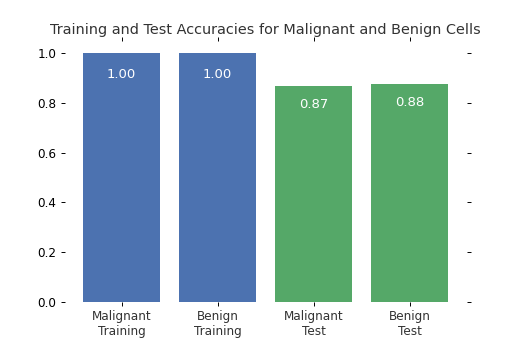

In [24]:
import matplotlib.pyplot as plt

%matplotlib notebook

# Find the training and testing accuracies by target value (i.e. malignant, benign)
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)